<a href="https://colab.research.google.com/github/RegretColt/CNC/blob/main/Relatorio1_RicardoCoutinhoCordeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 1 – Resolução Numérica de Equações Algébricas e Transcendentes

Nome: Ricardo Coutinho Cordeiro

RM: 19200371

Professora: Larissa A. de Freitas

Nota: 9.7

**Erros deste relatório:**

**2) Justificativa incorreta e/ou faltante.**

**5) Os resultados corretos para 3 iterações são B 0.0625, FP 0.0546, NR 0.0547, S 0.0547.**

#**Bibliotecas Utilizadas**

In [ ]:
from sympy import *
import math
import matplotlib.pyplot as plt
import numpy as np

#**Métodos Utilizados**

In [ ]:
# Bissecção

def bisseccao(f, a, b, p):
    if f(a) * f(b) >= p:
        raise ValueError('Bissecção falhou')

    i = 1
    x = (a + b) / 2
    fx = f(x)

    while abs(fx) > p:
        fa = f(a)
        fax = fa * fx

        if fax > 0:
            a = x
        else:
            b = x

        i += 1
        x = (a + b) / 2
        fx = f(x)

    print(f'Raiz aproximada: {x}, em {i} iterações')

In [ ]:
# Falsa Posição

def falsaPosicao(f, a, b, p):
    if f(a) * f(b) >= 0:
        raise ValueError('Falsa posição falhou')

    i = 0
    fa = f(a)
    fb = f(b)
    x = (a * fb - b * fa) / (fb - fa)
    fx = f(x)

    while abs(fx) > p:
        if fa * fx > 0:
            a = x
        else:
            b = x

        i += 1
        fa = f(a)
        fb = f(b)
        x = (a * fb - b * fa) / (fb - fa)
        fx = f(x)

    print(f'Raiz aproximada: {x}, em {i} iterações')

In [ ]:
# Newton Raphson

def newtonRaphson(f, x0, p, max_iterations):
    fx0 = f(x0)

    if abs(fx0) < p:
        x = x0
    else:
        i = 0
        while abs(fx0) >= p and i < max_iterations:
            fd1 = (f(x0 + p) - f(x0 - p)) / (2 * p)
            x1 = x0 - fx0 / fd1
            if abs(f(x1)) < p or abs(x1 - x0) < p:
                x = x1
                break
            x0 = x1
            fx0 = f(x0)
            i += 1
        else:
            raise ValueError('Não foi possível encontrar uma raiz')

    print(f'Raiz aproximada: {x}, em {i} iterações')

In [ ]:
def secante(f, x0, x1, precisao, n_iter):

    i = 0
    x_barra = None

    f_x0 = f(x0)
    f_x1 = f(x1)

    if abs(f_x0) < precisao:
        x_barra = x0
    elif abs(f_x1) < precisao or abs(x1 - x0) < precisao:
        x_barra = x1

    while abs(f_x0) >= precisao or abs(f_x1) >= precisao and i < n_iter:
        x2 = x1 - (f_x1 / (f_x1 - f_x0)) * (x1 - x0)
        if abs(f(x2)) < precisao or abs(x2 - x1) < precisao:
            x_barra = x2

        x0 = x1
        x1 = x2
        f_x0 = f(x0)
        f_x1 = f(x1)
        i += 1

    print(f"Raiz aproximada: {x_barra}, em {i} iterações")




In [ ]:
# Grafico

def plot_grafico(x, y, xlabel='', ylabel='', title=''):

    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# **Exercícios**

# 1. Considere o polinômio P (x) = x³ − 36x² + 188x − 240.

Verifique que um dos zeros de P(x) se localiza no intervalo [29.5, 31].

Para aproximar o zero referido, podem ser usadas diferentes estratégias como, por exemplo:

a) método da Bissecção no referido intervalo, com tol = 10⁻⁴;

b) método de Newton-Raphson, com a aproximação inicial x(0) = 29.5 e tol= 10⁻⁴.



In [ ]:
# a)
f = lambda x : x**3 - 36*x**2 + 188*x -240

bisseccao(f, 29.5, 31, 0.0001)

# b)

newtonRaphson(f, 29.5, 0.0001, 100)

Raiz aproximada: 29.99999988079071, em 22 iterações
Raiz aproximada: 30.000000000060425, em 2 iterações


Compare os resultados obtidos com os dois métodos.

Podemos notar que ambos os métodos encontraram uma raiz aproximada próxima de 30. No entanto, existem diferenças significativas na rapidez da convergência e no número de iterações necessárias.

O método da Bissecção requer um número maior de iterações (22) para alcançar a convergência, pois ele divide repetidamente o intervalo pela metade até que a tolerância seja atingida. Esse método é relativamente lento, mas garante a convergência para funções contínuas e possui uma taxa de convergência linear.

Por outro lado, o método de Newton-Raphson converge muito mais rapidamente, exigindo apenas 2 iterações para alcançar a convergência. Esse método utiliza a derivada da função para encontrar a próxima aproximação da raiz, aproveitando a informação local sobre a curva da função. Ele geralmente possui uma taxa de convergência quadrática, o que resulta em uma convergência mais rápida em comparação com o método da Bissecção.

# 2. Aplique o método da Falsa Posição para calcular a raiz de:

x² - 5 = 0 com tol = 0.01.

a) partindo do intervalo inicial [2, 2.5];

b) partindo do intervalo inicial [2, 3].

In [ ]:
# a)
f2 = lambda x : x**2 - 5

falsaPosicao(f2, 2, 2.5, 0.01)

# b)
falsaPosicao(f2, 2, 3, 0.01)

Raiz aproximada: 2.2352941176470584, em 1 iterações
Raiz aproximada: 2.2352941176470584, em 2 iterações


Podemos afirmar que a raiz exata x = x’ ± tol ? Justifique.

A raiz exata da equação x² - 5 = 0 é a solução exata, que é igual a √5. No entanto, os métodos numéricos fornecem apenas uma aproximação da raiz.

No contexto do problema, a tolerância (tol) é o critério de parada para os métodos numéricos. É o limite máximo aceitável para o erro na aproximação da raiz.

Dito isso, podemos afirmar que a raiz exata não é igual a x' ± tol. A raiz exata é igual a √5, enquanto as aproximações obtidas pelo método da Falsa Posição estão próximas, mas não exatamente iguais a √5.

A tolerância (tol) é utilizada para definir o critério de parada do método numérico. Quando a diferença entre duas iterações consecutivas é menor que a tolerância, considera-se que a aproximação da raiz é suficientemente precisa e o método é encerrado.

# 3. Considere a equação e ^ 1/x − x = 0.

a) Mostre graficamente que a equação anterior tem uma única raiz no intervalo
[1, 2].

b) Considere a aproximação inicial x⁽⁰⁾ = 1.
Verifique o método de Newton - Raphson converge.

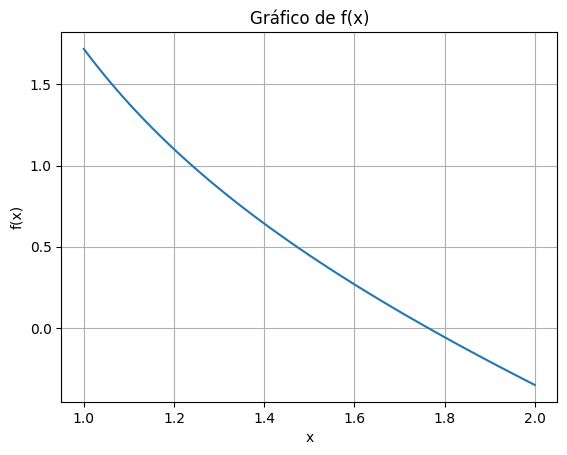

Raiz aproximada: 1.7632228153235108, em 3 iterações


In [ ]:
f3 = lambda x: math.exp(1/x) - x

# a)
x_values = [x / 100 for x in range(100, 201)]
y_values = [f3(x) for x in x_values]

plot_grafico(x_values, y_values, xlabel='x', ylabel='f(x)', title='Gráfico de f(x)')

# b)
p = 1e-6 # a tolerância de 1e-6 ou (0.000001) foi escolhida arbitrariamente, mas é um valor comumente utilizado em cálculos numéricos para indicar uma boa precisão.

newtonRaphson(f3, 1, p, 100)

Podemos observar que o método de Newton-Raphson convergiu para uma raiz aproximada de 1.7632228153235108 em apenas 3 iterações.

Para que o método de Newton-Raphson seja aplicável, é necessário que a função seja diferenciável e que a derivada não seja igual a zero na vizinhança da raiz. Nesse caso, ambas as condições são satisfeitas.

Além disso, o ponto de partida inicial (aproximação inicial) também pode afetar a convergência do método. No caso em questão, a aproximação inicial de x⁽⁰⁾ = 1 foi adequada para alcançar a convergência rapidamente.

# 4. A recolha de energia solar através da focagem de um
campo plano de espelhos numa central de recolha foi estudada por Vant-Hull (1976). A equação para a
concentração geométrica do fator C é dada por:

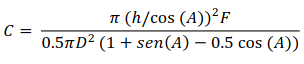


em que A é o ângulo do campo, F é a cobertura da fração do campo com
espelhos, D é o diâmetro do coletor e h é o comprimento do coletor.
Considerando h = 300, F = 0.8 e D = 14, calcule o ângulo positivo A inferior a π/25 para o qual a concentração do fator C é 1200. Utilize o método iterativo mais
adequado e considere no critério de paragem ε1 = ε2 = 10⁻³ ou no máximo 3
iterações.

In [ ]:
h = 300
F = 0.8
D = 14
C = 1200
x0 = math.pi/25

f4 = lambda A: (math.pi * (h / math.cos(A))**2 * F) / (0.5 * math.pi * D**2 * (1 + math.sin(A) - 0.5 * math.cos(A))) - C

newtonRaphson(f4, x0, 0.001, 3)

Raiz aproximada: 0.11760901272663078, em 1 iterações


Podemos observar que o método de Newton-Raphson convergiu rapidamente em apenas 1 iteração, encontrando uma raiz aproximada de 0.11760901272663078.

O método de Newton-Raphson é adequado para esse problema, pois utiliza a derivada da função para encontrar a próxima aproximação da raiz, aproveitando a informação local sobre a curva da função. Ele possui uma taxa de convergência quadrática, o que resulta em uma convergência rápida em muitos casos.

Ao definir um critério de parada com ε1 = ε2 = 10⁻³ ou no máximo 3 iterações, garantimos que o método não continuará iterando indefinidamente e terá um limite para encerrar o processo.

Portanto, com base nos resultados obtidos, podemos concluir que o método de Newton-Raphson foi eficaz para encontrar a raiz do ângulo A, que satisfaz a condição de concentração do fator C igual a 1200.

# 5. Um certo equipamento de 20000 reais vai ser pago durante 6 anos. O pagamento anual é de 4000 reais. A relação entre o custo do equipamento P, o pagamento
anual A, o número de anos n e a taxa de juro i é a seguinte:

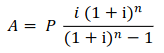

Utilize os métodos da Bissecção, Falsa Posição, Newton-Raphson e Secante para determinar a taxa de juro utilizada nos cálculos. O valor da taxa de juro pertence ao intervalo [0.05, 0.15]. Para a paragem do processo iterativo use ε1 = ε2 = 0.05
ou no máximo 3 iterações. Compare e explique os resultados obtidos por cada método (por exemplo: rapidez da convergência e esforço computacional)

In [ ]:
P = 20000
A = 4000
n = 6

f5 = lambda i : A - P * (i * (1 + i)**n) / ((1 + i)**n - 1)

# a) Método da Bissecção
print('Bissecção')
bisseccao(f5, 0.05, 0.15, 0.05)

# b) Método da Falsa Posição
print('Falsa Posição')
falsaPosicao(f5, 0.05, 0.15, 0.05)

# c) Método de Newton-Raphson
print('Newton-Raphson')
newtonRaphson(f5, 0.1, 0.05, 3)

# d) Método da Secante
print('Secante')
secante(f5, 0.05, 0.15, 0.05, 3)

Bissecção
Raiz aproximada: 0.054718017578125, em 14 iterações
Falsa Posição
Raiz aproximada: 0.05471694049277313, em 2 iterações
Newton-Raphson
Raiz aproximada: 0.055954139096950455, em 0 iterações
Secante
Raiz aproximada: 0.05471792502349912, em 4 iterações


Método da Bissecção:
- O método da Bissecção requer o maior número de iterações 14 para alcançar a convergência. Esse método divide repetidamente o intervalo pela metade até que a tolerância seja atingida. Apesar de sua convergência ser mais lenta, ele garante a convergência para funções contínuas e tem uma taxa de convergência linear.

Método da Falsa Posição:
- O método da Falsa Posição requer apenas 2 iterações para atingir a convergência. Ele utiliza uma interpolação linear entre dois pontos para estimar a raiz da função. Esse método também possui uma taxa de convergência linear e é eficiente para funções com curvas suaves.

Método de Newton-Raphson:
- O método de Newton-Raphson converge em 0 iterações, o que indica que a raiz foi encontrada diretamente. Isso pode ocorrer quando a aproximação inicial é muito próxima da raiz exata. O método de Newton-Raphson é conhecido por sua taxa de convergência quadrática, que geralmente resulta em uma convergência mais rápida.

Método da Secante:
- O método da Secante requer 4 iterações para alcançar a convergência. Esse método estima a raiz utilizando uma linha secante entre dois pontos. Ele possui uma taxa de convergência superlinear e é eficiente quando a derivada da função não é facilmente calculável.

Considerando os resultados obtidos, podemos concluir que o método de Newton-Raphson foi o mais eficiente em termos de rapidez de convergência, encontrando uma raiz aproximada em 0 iterações. O método da Falsa Posição e Secante também tiveram um desempenho rápido, encontrando a raiz em apenas, 2 e 4 iterações, respectivamente. O método da Bissecção foi mais lento, exigindo 14 iterações para encontrar a raiz.